# QUICK EDA

Here i just scan train data and build a big picture.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
#from collections import Counter
import networkx as nx 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'train_relationships.csv', 'train', 'sample_submission.csv']


# Let's explore the train dataset...

In [2]:
fam = os.listdir("../input/train")
print('We have',len(fam),'families')
ind = []
num = []
pic = []
tot = 0
totpic = 0
for i in fam:
    path = "../input/train/"+str(i)
    temp = os.listdir(path)
    ind.append(temp)
    num.append(len(temp))
    tot+=len(temp)
    for j in temp:
        newpath = path+"/"+str(j)
        temp = os.listdir(newpath)
        pic.append(temp)
        totpic+=len(temp)
print('And',tot,'individuals with',totpic,'pictures.')
print('On average, we see',tot/len(fam),'members per family.')
print('With an average of',totpic/tot,'per individual.')

We have 470 families
And 2316 individuals with 12379 pictures.
On average, we see 4.927659574468085 members per family.
With an average of 5.344991364421416 per individual.


# Let's put all the train relations in a graph...

If i add all pictures in the graph, the kernel crash...

In [3]:
# Create graph from data 
g = nx.Graph()
color_map = []
for i in range(0,len(fam)): #len(names)
    g.add_node(fam[i], type = 'fam')
    for j in ind[i]:
        temp = fam[i]+j
        g.add_node(temp, type = 'ind')
        g.add_edge(fam[i], temp, color='green', weight=1)
for n1, attr in g.nodes(data=True):
    if attr['type'] == 'fam':
        color_map.append('lime')
    else: 
        if attr['type'] == 'ind':
            color_map.append('cyan')
        else:
            color_map.append('red')

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


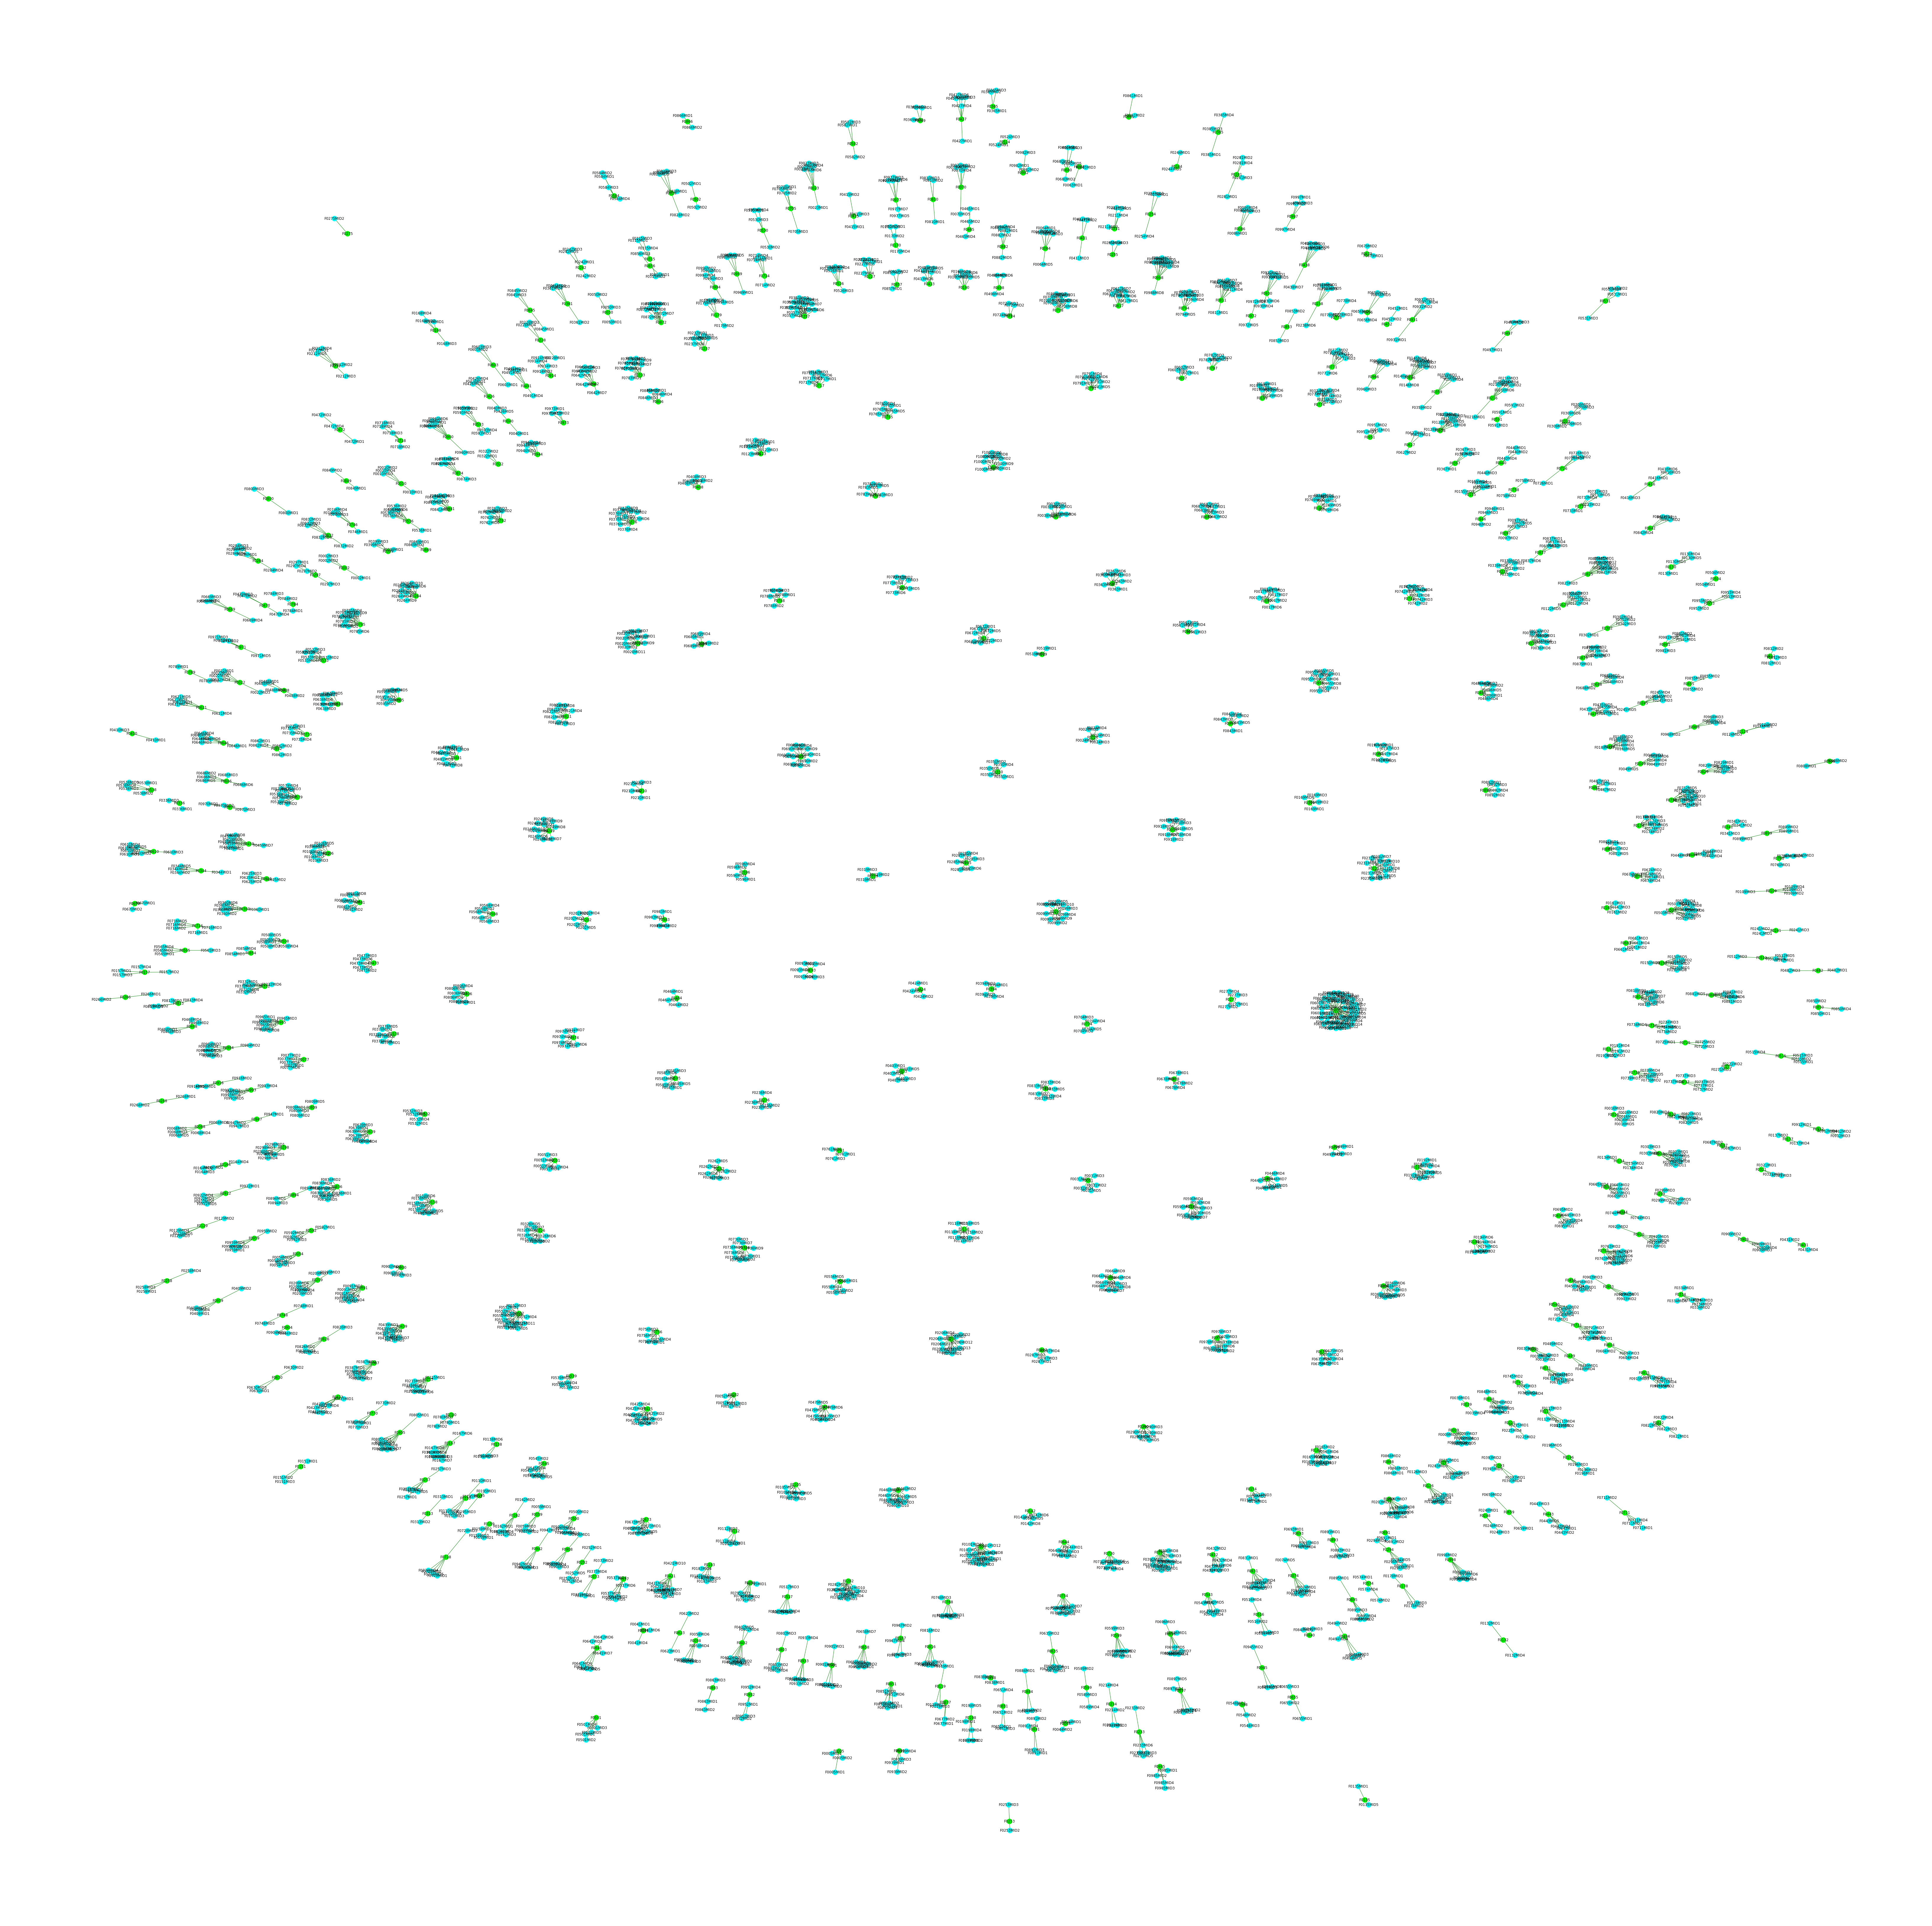

In [4]:
# Plot the graph
plt.figure(3,figsize=(90,90))  
edges = g.edges()
colors = [g[u][v]['color'] for u,v in edges]
nx.draw(g,node_color = color_map, edge_color = colors, with_labels = True)
plt.show()

# What can we learn from our graph?

In [5]:
# Extract reference graph facts & metrics 
print('Reference Graph')
print('Do we have a fully connected graph? ',nx.is_connected(g))
d = list(nx.connected_component_subgraphs(g))
print('The graph contains',len(d), 'sub-graph')
nx.isolates(g)
h = g.to_directed()
N, K = h.order(), h.size()
avg_deg= float(K) / N
print ("# Nodes: ", N)
print ("# Edges: ", K)
print ("Average Degree: ", avg_deg)
# Extract reference graph facts & metrics 
in_degrees= h.in_degree() # dictionary node:degree

Reference Graph
Do we have a fully connected graph?  False
The graph contains 470 sub-graph
# Nodes:  2786
# Edges:  4632
Average Degree:  1.6625987078248385
